In [3]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris

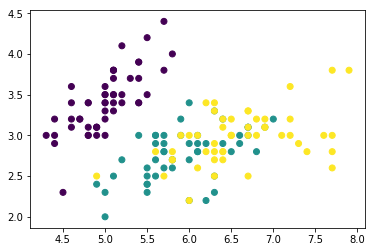

In [7]:
data = load_iris().data
target = load_iris().target
train = data[:,:2]

plt.scatter(train[:,0],train[:,1],c=target)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

knn = KNeighborsClassifier()
logistic = LogisticRegression()
# max_depth决策树深度，值越大，越容易过拟合
tree = DecisionTreeClassifier(max_depth=1)

knn.fit(train,target)
logistic.fit(train,target)
tree.fit(train,target)

# 获取预测样本集（样本坐标系上所有的点）
xmin,xmax = train[:,0].min(),train[:,0].max()
ymin,ymax = train[:,1].min(),train[:,1].max()

x = np.linspace(xmin,xmax,300)
y = np.linspace(ymin,ymax,300)

xx,yy = np.meshgrid(x,y)

X_test = np.c_[xx.ravel(),yy.ravel()]

# 预测结果
y1_ = knn.predict(X_test)
y2_ = logistic.predict(X_test)
y3_ = tree.predict(X_test)

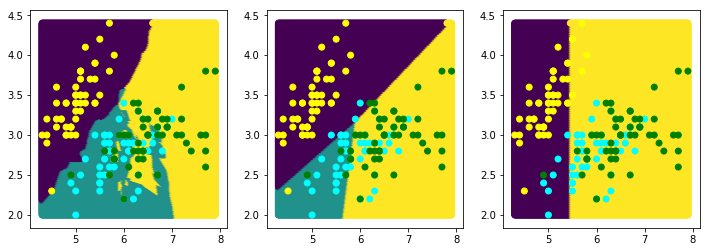

In [13]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['yellow','cyan','green'])

plt.figure(figsize=(12,4))

axes1 = plt.subplot(1,3,1)
axes1.scatter(X_test[:,0],X_test[:,1],c=y1_)
axes1.scatter(train[:,0],train[:,1],c=target,cmap=cmap)

axes2 = plt.subplot(1,3,2)
axes2.scatter(X_test[:,0],X_test[:,1],c=y2_)
axes2.scatter(train[:,0],train[:,1],c=target,cmap=cmap)

axes3 = plt.subplot(1,3,3)
axes3.scatter(X_test[:,0],X_test[:,1],c=y3_)
axes3.scatter(train[:,0],train[:,1],c=target,cmap=cmap)